# DSCI 100 Project: Planning Stage (Individual)

#### Name: Jasleen Jhajj

#### Student ID: 98671837

## Description of Data

A UBC Computer Science research group is studying how people play video games, focusing on Minecraft. They set up a Minecraft server to track player actions. The data is divided into two sets: players.csv and sessions.csv. Below is a summary of each dataset.

---
players.csv (Player Data)

Variables (Columns): 7

Observations (Rows): 194

Description of Variables:

| Variable Name | Variable Type | Description |
| --- | --- | --- |
| experience | Character | The experience level of the player could be one of the following: Beginner, Amateur, Veteran, or Pro |
| is_subscribed | Logical | This determines if the player is subscribed to the newsletter or not, the 2 possible answers could be either TRUE or FALSE |
| hashedEmail | Character | This is the encrypted version of the player’s email for privacy |
| played_hours | Double | This is the length of time a player has played, in hours |
| name | Character | This is the name of the player |
| gender | Character | This is the gender of the player |
| age | Double | This is the age of the player, in years |

---

sessions.csv (Session Data)

Variables (Columns): 5

Observations (Rows): 1533

Description of Variables:

| Variable Name | Variable Type | Description |
| --- | --- | --- |
| hashedEmail | Character | This is the encrypted version of the player’s email for privacy |
| start_time | Character | This is the start time on a certain date, stored in a human readable format |
| end_time | Character | This is the end time on a certain date, stored in a human readable format |
| original_start_time | Double | This is a timestamp of the start time, stored in a system format |
| original_end_time | Double | This is a timestamp of the end time, stored in a system format |

**Potential Issues:**

* Not very human readable
* Some players have played 0 hour
* hashedEmail is extremely hard to read, as it is just a long sequence of numbers and letters
* In the sessions.csv data set, it is very unclear what the original_start_time and original_end_time columns represent
* The start_time and end_time columns have 2 observations in each cell, making the data untidy
* This, along with the fact that there are multiple players in the players.csv data set that have player 0 hours, will cause issues when trying to create visuals for this data


---

## Questions

#### Broad Question:
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

#### Specific Question:
Can a player's playtime (played_hours), experience level (experience), and number of sessions (number_of_sessions) predict their likelihood of subscribing to the newsletter (subscribe)?

#### Description of Question:
played_hours, experience, and number_of_sessions are key factors in predicting whether a player will subscribe to the newsletter. played_hours measures overall engagement, experience indicates skill level and familiarity with the game, and number_of_sessions reflects playing habits. Preparing the data involves scaling numerical values, encoding categorical variables, and handling missing data to ensure the model can accurately identify patterns and make reliable predictions.

In [1]:
# Importing libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
library(ggplot2)
library(forcats)
library(lubridate)

#Limit output of dataframes to 6 frames
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players <- read_csv("https://raw.githubusercontent.com/JasleenJhajj/toy_ds_project/refs/heads/main/players.csv")
players
sessions <- read_csv("https://raw.githubusercontent.com/JasleenJhajj/toy_ds_project/refs/heads/main/sessions.csv")
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [3]:
# Determine if there are missing values in each dataset
cat("\nMissing values in players.csv:\n")
print(colSums(is.na(players)))

# Determine the unique values for categorical variables in players
cat("\nUnique values in 'experience':\n")
print(unique(players$experience))

cat("\nUnique values in 'gender':\n")
print(unique(players$gender))


Missing values in players.csv:
  experience    subscribe  hashedEmail played_hours         name       gender 
           0            0            0            0            0            0 
         Age 
           2 

Unique values in 'experience':
[1] "Pro"      "Veteran"  "Amateur"  "Regular"  "Beginner"

Unique values in 'gender':
[1] "Male"              "Female"            "Non-binary"       
[4] "Prefer not to say" "Agender"           "Two-Spirited"     
[7] "Other"            


In [4]:
# Summary statistics for quantitative variables in the players data set

players_summarized <- players |>
summarize (total_players = n(),
           mean_age = mean(Age, na.rm = TRUE),
           median_age = median(Age, na.rm = TRUE),
           sd_age = sd(Age, na.rm = TRUE),
           min_age = min(Age, na.rm = TRUE),
           max_age = max(Age, na.rm = TRUE),
           mean_hours = mean(played_hours, na.rm = TRUE),
           median_hours = median(played_hours, na.rm = TRUE),
           sd_hours = sd(played_hours, na.rm = TRUE),
           min_hours = min(played_hours, na.rm = TRUE),
           max_hours = max(played_hours, na.rm = TRUE))
players_summarized

total_players,mean_age,median_age,sd_age,min_age,max_age,mean_hours,median_hours,sd_hours,min_hours,max_hours
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
196,20.52062,19,6.174667,8,50,5.845918,0.1,28.35734,0,223.1


In [5]:
# Clean NA values from players data set
clean_players <- players |>
filter(!is.na(experience), !is.na(subscribe), !is.na(hashedEmail), !is.na(played_hours), !is.na(Age))

# Clean NA values from sessions data set
clean_sessions <- sessions |>
filter(!is.na(hashedEmail), !is.na(original_start_time), !is.na(original_end_time))

In [6]:
# Create new column called number_of_sessions (Total number of sessions played per player)

sessions_player <- clean_sessions |>
group_by(hashedEmail) |>
summarize(number_of_sessions = n(), .groups = "drop")

# Merge players and sessions data sets
# Remove players without any sessions
players_combined <- clean_players |>
left_join (sessions_player, by = "hashedEmail") |>
filter (!is.na(number_of_sessions))

# Convert `experience` from a Character to a Factor using as.factor function
players_combined$experience <- as.factor(players_combined$experience)

#Final data set
players_final <- players_combined |>
select(played_hours, number_of_sessions, subscribe, experience)
players_final

played_hours,number_of_sessions,subscribe,experience
<dbl>,<int>,<lgl>,<fct>
30.3,27,TRUE,Pro
3.8,3,TRUE,Veteran
0.0,1,FALSE,Veteran
⋮,⋮,⋮,⋮
0.3,1,FALSE,Veteran
0.0,1,FALSE,Amateur
2.3,6,FALSE,Amateur


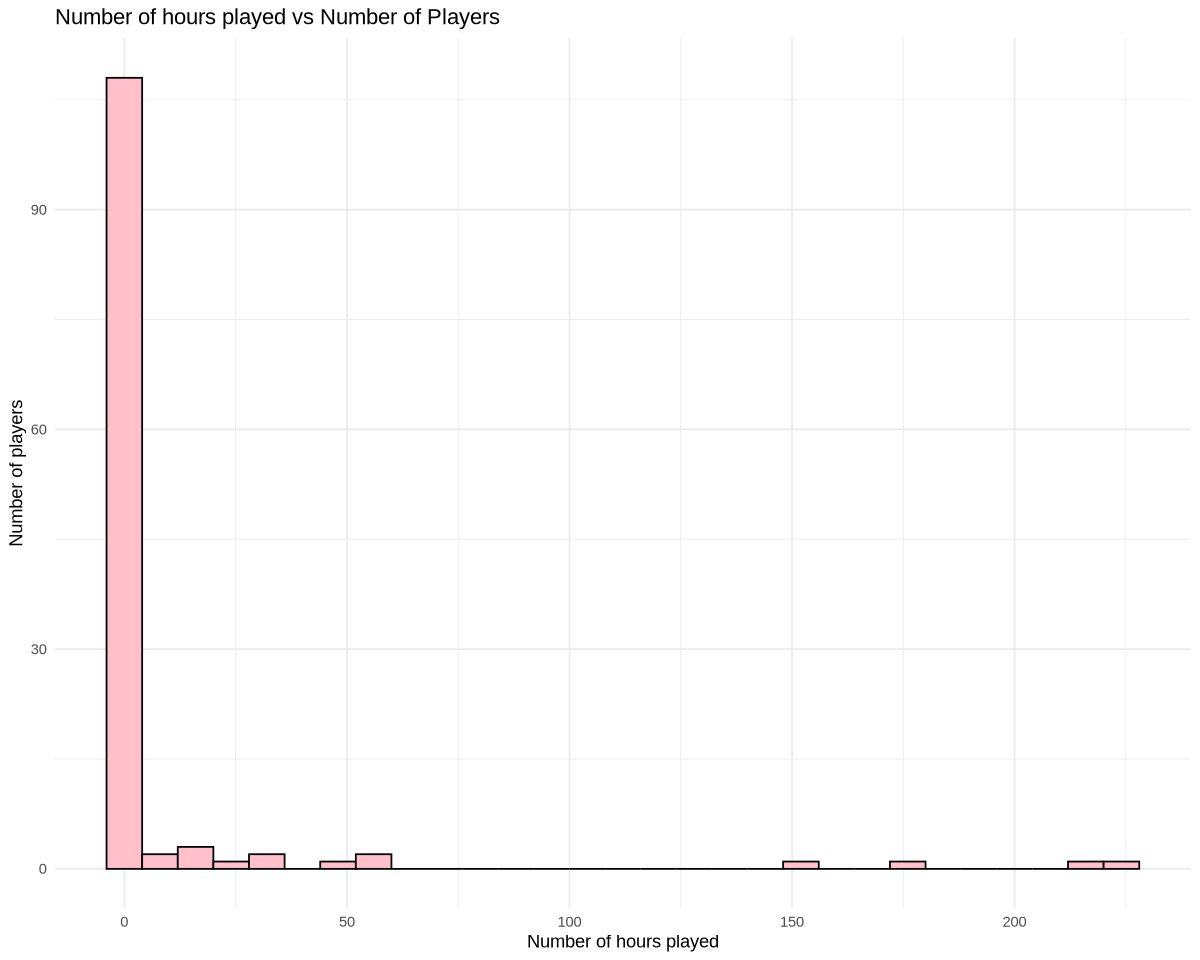

In [7]:
# Visulization: Number of hours played vs Number of Players

options(repr.plot.width = 10, repr.plot.height = 8)

visualization_1 <- ggplot(players_final, aes(x = played_hours)) +
geom_histogram(binwidth = 8, fill = "pink", color = "black") +
xlab("Number of hours played") +
ylab("Number of players") +
ggtitle ("Number of hours played vs Number of Players") +
theme_minimal ()
visualization_1

The visualization shows an uneven distribution of played hours, with many players having 0 hours and a few logging significantly long playtimes.

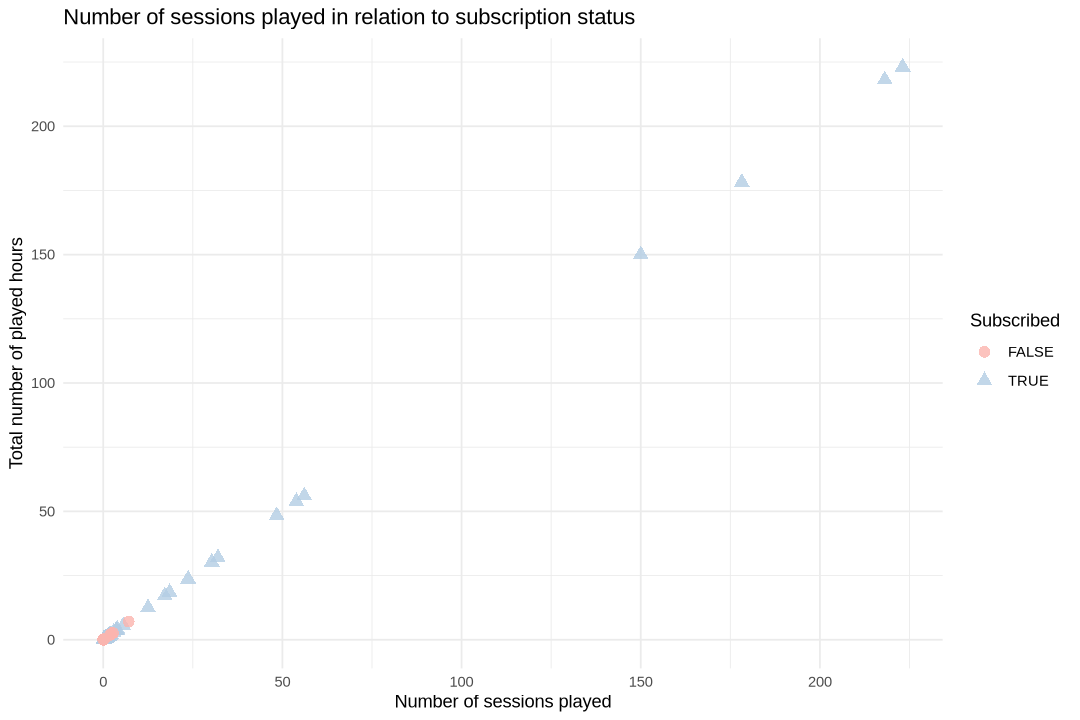

In [8]:
# Visualization: Total number of sessions played vs The number of played hours based on whether or not the player has subscribed to the newsletter

options(repr.plot.width = 9, repr.plot.height = 6)

visualization_2 <- ggplot(players_final, aes(x = played_hours, y = played_hours, color = as.factor(subscribe), shape = as.factor(subscribe))) +
geom_point(alpha = 0.8, size = 3) +
scale_color_brewer(palette = "Pastel1") +
labs(x = "Number of sessions played", y = "Total number of played hours", color = "Subscribed", shape = "Subscribed" ) +
ggtitle ("Number of sessions played in relation to subscription status") +
theme_minimal ()
visualization_2

There appears to be a relationship between played hours and subscription status, with subscribed players having logged more hours on average than those who did not subscribe.

---

## Methods and Plan

#### Method:
K-NN Classification
* Makes no assumptions about data distribution
* Predicts by finding similar players and voting

---

#### Assumptions Required:
* Numerical values must be scaled to avoid dominance
* Players with similar experience, playtime, and sessions behave alike

---

#### Limitations:
* Requires scaling
* High memory usage for large datasets, slowing computation
* Sensitive to outliers
* Dependent on k (small = overfitting, large = underfitting)

---

#### Model Comparison:
* Use k-fold cross-validation to find optimal k
* Choose appropriate distance metric
* Scale data
* Evaluate performance using confusion matrix, recall, accuracy, and precision
* Compare with other models

---

#### Data Processing:
* Clean and preprocess data (handle missing values, scale numerical variables, encode categorical features)
* Split data into training and testing sets
* Train K-NN using workflow and tune_grid() to optimize k
* Evaluate model on the test set